# Using PLATO-point

Kudos to the [PlatoSim3 folks at KU Leuven](https://github.com/IvS-KULeuven/PlatoSim3) for all the maths - this code fully plagiarises theirs, but makes the calculations a little more usable for an observer.

In [2]:
from platopoint import platopoint

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord
import astropy.units as u

### Example: Beta Pic

First grabbing the coordinates:

In [4]:
betapic=SkyCoord("05 47 17.0876901 -51 03 59.441135", unit=(u.hourangle,u.deg))

Now asking platopoint. It will tell us, for each group of cameras:
1) Which CCD it is groups it is observed in (or "None")
2) The x-coordinate in the given camera CCD 
3) The y-coordinate in the given camers CCD

Note that coordinates close to either 0 or 4510 (the maximum CCD rows) may eventually not be observable depending on post-manufaturing tolerances of the Cameras and on-sky performances.

In [5]:
platopoint(betapic)

({1: '4', 2: '1', 3: '2', 4: '3'},
 {1: 2571.738255649256,
  2: 2177.803862718722,
  3: 181.29418102524028,
  4: 594.3402711618484},
 {1: 3916.7523704096775,
  2: 1910.8835719867504,
  3: 2364.841890963639,
  4: 4322.341228926212})

### Arguments:

- targetCoord - the Target coordinates as an astropy SkyCoord object. REQUIRED
- normal - Whether to use the "normal" or "fast" cameras. Fast cameras have minimal bandwidth and reduced FoV.
- nCamera=None - If you prefer not to loop over all Cameras, select one
- nCCD=None - If you prefer not to loop over all CCDs, select one
- Quarter=1 - PLATO rotation should maintain field position every quarter/rotation, but to update the rotation the quarter can be specified.
- platformCoord - the Platform coordinates as an astropy SkyCoord object. Default is the LOPS2 Southern field used for the initial stare field ("06:21:14.5 -47:53:13")
- focalPlaneAngle - Assumed as 0 (i.e. focal plane matched CCD Y-axis)
- focalLength - Assumed as 227mm as anticipated
- pixelSize - Assumed as 11um as anticipated

### Which known exoplanets with PLATO observe?

Let's access the NASA Exoplanet table and see which of those are in the PLATO FoV:

In [14]:
#Getting the NASA exoplanet archive using astroquery:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
allpls=NasaExoplanetArchive.query_criteria(table="pscomppars",select="*").to_pandas()

UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]


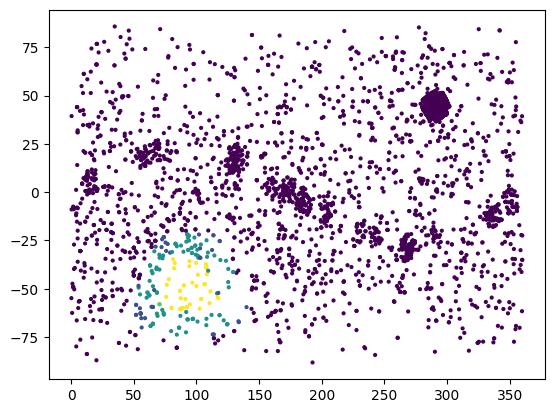

In [15]:
#Looping through to get the PLATO pointings:
xmats=[]
for row in allpls.iterrows():
    cams,xpix,ypix=platopoint(SkyCoord(row[1]['ra']*u.deg,row[1]['dec']*u.deg))
    #Loading all these output info into a Pandas object:
    xmats+=[pd.Series({'G1_cam':cams[1],'G1_xpix':xpix[1],'G1_ypix':ypix[1],
                       'G2_cam':cams[2],'G2_xpix':xpix[2],'G2_ypix':ypix[2],
                       'G3_cam':cams[3],'G3_xpix':xpix[3],'G3_ypix':ypix[3],
                       'G4_cam':cams[4],'G4_xpix':xpix[4],'G4_ypix':ypix[4],
                       'N_cams':6*np.sum([cams[c] is not None for c in cams])},name=row[0])]
xmats=pd.concat(xmats,axis=1).T #We need to concat and transpose for it to be in the correct column/row format
plt.scatter(allpls['ra'].values,allpls['dec'].values,c=xmats['N_cams'],s=4)

In [16]:
print(np.unique(allpls.loc[xmats['N_cams']>0,'hostname']))

['AB Pic' 'DENIS-P J082303.1-491201' 'DMPP-3 A' 'GJ 143' 'GJ 163'
 'GJ 2056' 'GJ 229' 'GJ 3341' 'HATS-39' 'HATS-4' 'HATS-40' 'HATS-41'
 'HATS-42' 'HATS-43' 'HATS-44' 'HATS-45' 'HATS-51' 'HATS-55' 'HATS-63'
 'HATS-66' 'HATS-70' 'HATS-76' 'HD 21693' 'HD 22496' 'HD 22532' 'HD 23079'
 'HD 23127' 'HD 23472' 'HD 24085' 'HD 25171' 'HD 25912' 'HD 27442'
 'HD 27631' 'HD 27894' 'HD 28109' 'HD 28254' 'HD 29399' 'HD 29985'
 'HD 30177' 'HD 30669' 'HD 30856' 'HD 31527' 'HD 33283' 'HD 38283'
 'HD 39194' 'HD 40307' 'HD 41004 A' 'HD 41004 B' 'HD 43197' 'HD 45184'
 'HD 45364' 'HD 47186' 'HD 47536' 'HD 48265' 'HD 50499' 'HD 51608'
 'HD 55696' 'HD 56414' 'HD 56957' 'HD 60532' 'HD 63765' 'HD 64121'
 'HD 65216' 'HD 69123' 'HD 70642' 'HD 73526' 'HD 76700' 'HD 76920'
 'HD 80883' 'HIP 19976' 'HIP 35965' 'HIP 38594' 'HR 2562' 'KELT-14'
 'KELT-15' 'Kapteyn' 'L 98-59' 'LHS 1678' 'LHS 1815' 'NGTS-1' 'NGTS-10'
 'NGTS-15' 'NGTS-17' 'NGTS-23' 'NGTS-3 A' 'NGTS-4' 'NGTS-6' 'RR Cae'
 'TOI-1221' 'TOI-1338 A' 'TOI-150' 'T

Checking a specific target, TOI-270 b:

In [18]:
xmats.loc[allpls['pl_name']=='TOI-270 b']

,G1_cam,G1_xpix,G1_ypix,G2_cam,G2_xpix,G2_ypix,G3_cam,G3_xpix,G3_ypix,G4_cam,G4_xpix,G4_ypix,N_cams
365,None,None,None,None,None,None,1,2943.105303,2345.015665,1,57.574622,2426.640554,12
